# Los Angeles Crime Records: 2010-2020
- This notebook is used for exploring preprocessed crime data

#### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import requests
import geopandas
from mpl_toolkits.axes_grid1 import make_axes_locatable
import contextily as ctx
from shapely.geometry import Point

#### Read in data

In [2]:
crime = pd.read_csv('../datasets/crime_final.csv')
print(crime.shape)

(2210104, 337)


#### Ten year trends

In [4]:
years = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]

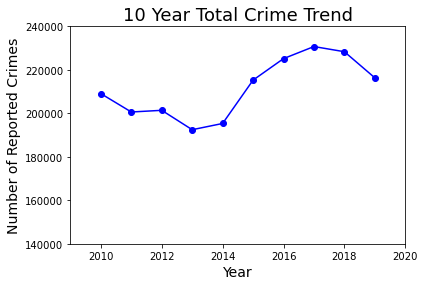

In [5]:
annual = []
for year in years:
    annual.append(crime[crime[str(year)]==1].shape[0])
plt.plot(years[:-1],annual[:-1],'bo')
plt.plot(years[:-1],annual[:-1],'b-')
plt.xlabel('Year',fontsize=14)
plt.ylabel('Number of Reported Crimes',fontsize=14)
plt.title('10 Year Total Crime Trend',fontsize=18)
plt.xlim(2009,2020)
plt.ylim(140000,240000);
#plt.savefig('images/la_crime_2010-2019.png',dpi=235,bbox_inches='tight');

### Top five crimes by year

In [6]:
code_15 = list(crime[crime['2015']==1]['Crm Cd'].value_counts(normalize=True).sort_values(ascending=False)[0:5].index)
pct_15 = list(crime[crime['2015']==1]['Crm Cd'].value_counts(normalize=True).sort_values(ascending=False)[0:5])
desc_15 = list(crime[crime['2015']==1]['Crm Cd Desc'].value_counts(normalize=True).sort_values(ascending=False)[0:5].index)

top_5_15 = list(zip(pct_15,code_15,desc_15))
top_5_15

[(0.08175627340041064, 624, 'BATTERY - SIMPLE ASSAULT'),
 (0.07464905190594312, 510, 'VEHICLE - STOLEN'),
 (0.07319973615020857, 440, 'THEFT PLAIN - PETTY ($950 & UNDER)'),
 (0.0694092180198259, 354, 'THEFT OF IDENTITY'),
 (0.06896791995317596, 310, 'BURGLARY')]

In [7]:
type5 = {}

type5['2015'] = list(crime[crime['2015']==1]['Crm Cd Desc'].value_counts(normalize=True).sort_values(ascending=False)[0:5].index)
type5['2016'] = list(crime[crime['2016']==1]['Crm Cd Desc'].value_counts(normalize=True).sort_values(ascending=False)[0:5].index)
type5['2017'] = list(crime[crime['2017']==1]['Crm Cd Desc'].value_counts(normalize=True).sort_values(ascending=False)[0:5].index)
type5['2018'] = list(crime[crime['2018']==1]['Crm Cd Desc'].value_counts(normalize=True).sort_values(ascending=False)[0:5].index)
type5['2019'] = list(crime[crime['2019']==1]['Crm Cd Desc'].value_counts(normalize=True).sort_values(ascending=False)[0:5].index)
type5['2020'] = list(crime[crime['2020']==1]['Crm Cd Desc'].value_counts(normalize=True).sort_values(ascending=False)[0:5].index)

pd.DataFrame(type5)

,2015,2016,2017,2018,2019,2020
0,BATTERY - SIMPLE ASSAULT,VEHICLE - STOLEN,BATTERY - SIMPLE ASSAULT,BATTERY - SIMPLE ASSAULT,BATTERY - SIMPLE ASSAULT,VEHICLE - STOLEN
1,VEHICLE - STOLEN,BATTERY - SIMPLE ASSAULT,VEHICLE - STOLEN,BURGLARY FROM VEHICLE,BURGLARY FROM VEHICLE,BATTERY - SIMPLE ASSAULT
2,THEFT PLAIN - PETTY ($950 & UNDER),BURGLARY FROM VEHICLE,BURGLARY FROM VEHICLE,VEHICLE - STOLEN,VEHICLE - STOLEN,BURGLARY FROM VEHICLE
3,THEFT OF IDENTITY,THEFT PLAIN - PETTY ($950 & UNDER),BURGLARY,THEFT PLAIN - PETTY ($950 & UNDER),THEFT PLAIN - PETTY ($950 & UNDER),BURGLARY
4,BURGLARY,BURGLARY,THEFT PLAIN - PETTY ($950 & UNDER),BURGLARY,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...","VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA..."


In [8]:
crime['Crm Cd Desc'].value_counts()[:10]

BATTERY - SIMPLE ASSAULT                                   198647
VEHICLE - STOLEN                                           169428
BURGLARY FROM VEHICLE                                      168897
THEFT PLAIN - PETTY ($950 & UNDER)                         155224
BURGLARY                                                   154033
THEFT OF IDENTITY                                          129955
INTIMATE PARTNER - SIMPLE ASSAULT                          119891
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    115682
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              97792
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                    93855
Name: Crm Cd Desc, dtype: int64

#### Time series function

In [9]:
def year_series(years,data,column,value,norm):
    series = []
    if norm == 0:
        for year in years:
            series.append((data[(data[str(year)]==1) & (data[column] == value)].shape[0]))
    else:
        for year in years:
            series.append((data[(data[str(year)]==1) & (data[column] == value)].shape[0])/(data[data[str(year)]==1].shape[0]))        
    return series

#### Top 10 reported crimes, 10 year trend

In [10]:
top10_desc = list(crime['Crm Cd Desc'].value_counts()[:10].index)
top10_desc

['BATTERY - SIMPLE ASSAULT',
 'VEHICLE - STOLEN',
 'BURGLARY FROM VEHICLE',
 'THEFT PLAIN - PETTY ($950 & UNDER)',
 'BURGLARY',
 'THEFT OF IDENTITY',
 'INTIMATE PARTNER - SIMPLE ASSAULT',
 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
 'VANDALISM - MISDEAMEANOR ($399 OR UNDER)']

In [11]:
crimeseries_top10 = {}

for desc in top10_desc:
    crimeseries_top10[desc] = year_series(years,crime,'Crm Cd Desc',desc,0)
crimeseries_top10 = pd.DataFrame(crimeseries_top10)
crimeseries_top10['year'] = years
crimeseries_top10.set_index('year',inplace=True)
crimeseries_top10.head(3)

,BATTERY - SIMPLE ASSAULT,VEHICLE - STOLEN,BURGLARY FROM VEHICLE,THEFT PLAIN - PETTY ($950 & UNDER),BURGLARY,THEFT OF IDENTITY,INTIMATE PARTNER - SIMPLE ASSAULT,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)","ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",VANDALISM - MISDEAMEANOR ($399 OR UNDER)
year,,,,,,,,,,
2010,20524,16667,17702,11136,16082,13215,10412,10049,8351,9941
2011,19907,15165,15887,14642,15915,13425,10064,8752,7922,10356
2012,19822,14824,15916,16105,15117,14340,10283,9035,7532,9778


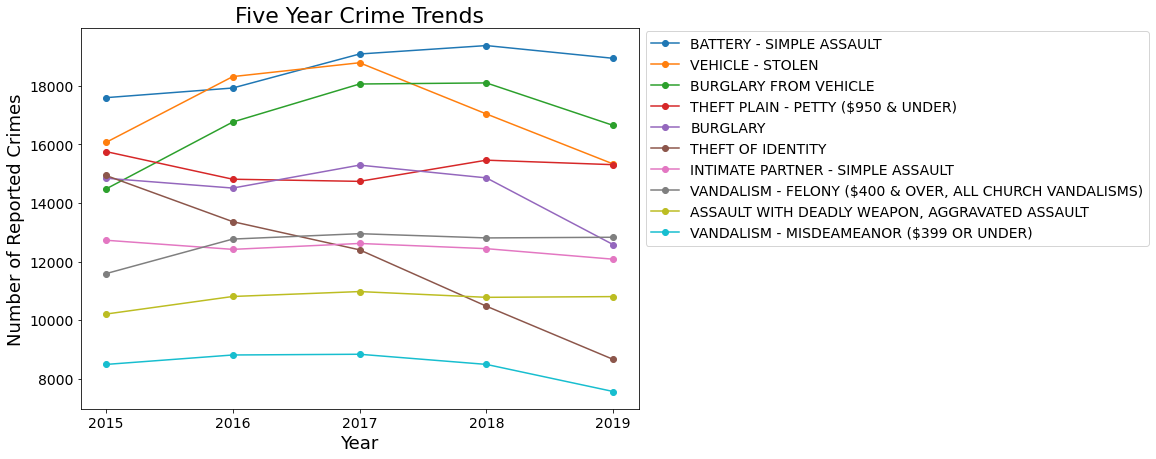

In [12]:
plt.figure(figsize=(10,7))
for code in crimeseries_top10.columns:
    plt.plot(crimeseries_top10.index[5:-1],crimeseries_top10[code][5:-1],'o-',label=code)
plt.legend(bbox_to_anchor=(1, 1.01), loc='upper left', ncol=1,fontsize=14)
plt.xlabel('Year',fontsize=18)
plt.ylabel('Number of Reported Crimes',fontsize=18)
plt.title('Five Year Crime Trends',fontsize=22)
plt.xticks([2015,2016,2017,2018,2019],fontsize=14)
plt.yticks(fontsize=14);
plt.savefig('images/crimetrends_5yr.png',dpi=235,bbox_inches='tight');

([<matplotlib.axis.XTick at 0x14c171070>,
 <a list of 5 Text major ticklabel objects>)

<Figure size 1008x1008 with 0 Axes>

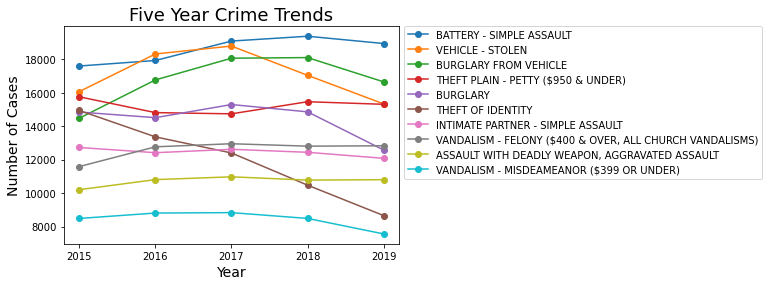

In [13]:
plt.figure(figsize=(14,14))
crimeseries_top10[5:-1].plot(marker='o')
plt.legend(bbox_to_anchor=(1, 1.025), loc='upper left', ncol=1)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Number of Cases',fontsize=14)
plt.title('Five Year Crime Trends',fontsize=18);
plt.xticks([2015,2016,2017,2018,2019])
#plt.savefig('images/la_crime_2010-2019.png',dpi=235,bbox_inches='tight');

In [14]:
crimeseries_top10_pct = {}
for desc in top10_desc:
    crimeseries_top10_pct[desc] = year_series(years,crime,'Crm Cd Desc',desc,1)
crimeseries_top10_pct = pd.DataFrame(crimeseries_top10_pct)
crimeseries_top10_pct['year'] = years
crimeseries_top10_pct.set_index('year',inplace=True)
crimeseries_top10_pct.head(3)

,BATTERY - SIMPLE ASSAULT,VEHICLE - STOLEN,BURGLARY FROM VEHICLE,THEFT PLAIN - PETTY ($950 & UNDER),BURGLARY,THEFT OF IDENTITY,INTIMATE PARTNER - SIMPLE ASSAULT,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)","ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",VANDALISM - MISDEAMEANOR ($399 OR UNDER)
year,,,,,,,,,,
2010,0.098174,0.079725,0.084675,0.053268,0.076926,0.063212,0.049805,0.048068,0.039946,0.047552
2011,0.099230,0.075593,0.079192,0.072986,0.079331,0.066920,0.050166,0.043626,0.039489,0.051622
2012,0.098426,0.073609,0.079031,0.079970,0.075064,0.071205,0.051060,0.044863,0.037400,0.048553


Text(0.5, 1.0, '2020 Reported Crime Trends')

<Figure size 1008x1008 with 0 Axes>

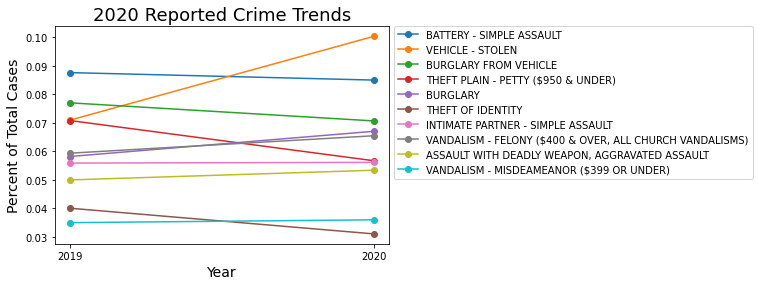

In [15]:
plt.figure(figsize=(14,14))
crimeseries_top10_pct[-2:].plot(marker='o')
plt.legend(bbox_to_anchor=(1, 1.025), loc='upper left', ncol=1)
plt.xticks([2019,2020],labels=['2019','2020'])
plt.xlabel('Year',fontsize=14)
plt.ylabel('Percent of Total Cases',fontsize=14)
plt.title('2020 Reported Crime Trends',fontsize=18)
#plt.savefig('images/2020_topcrimes_pct.png',dpi=235,bbox_inches='tight');

<Figure size 1008x1008 with 0 Axes>

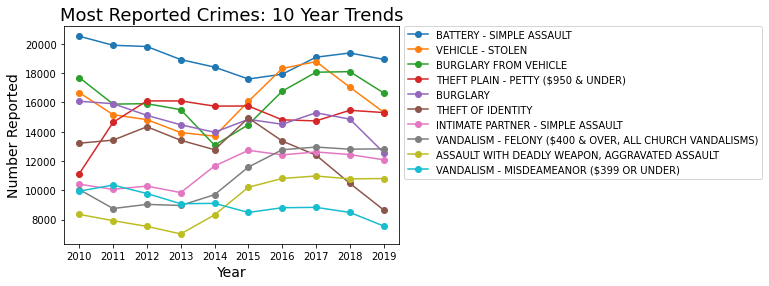

In [16]:
plt.figure(figsize=(14,14))
crimeseries_top10[:-1].plot(marker='o')
plt.legend(bbox_to_anchor=(1, 1.025), loc='upper left', ncol=1)
plt.xticks([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019])
plt.xlabel('Year',fontsize=14)
plt.ylabel('Number Reported',fontsize=14)
plt.title('Most Reported Crimes: 10 Year Trends',fontsize=18);
#plt.savefig('images/crime_types_10yr.png',dpi=235,bbox_inches='tight');

#### MO Codes

In [17]:
top_mo = list(crime['Mocodes'].value_counts(normalize=True)[:10].index)

In [18]:
mocodes_top20 = {}
for mo in top_mo:
    mocodes_top20[mo] = year_series(years,crime,'Mocodes',mo,0)
mocodes_top20 = pd.DataFrame(mocodes_top20)
mocodes_top20['year'] = years
mocodes_top20.set_index('year',inplace=True)
mocodes_top20.head(3)

,0344,0329,1501,0416,0325,0329 1300,1822,0344 1300,0400,0377
year,,,,,,,,,,
2010,23439,9458,5885,4105,2955,2240,1532,2213,1896,1918
2011,22385,8731,5219,3471,2646,2135,1716,1929,1506,1669
2012,22836,8427,4456,2930,2421,1755,2224,1088,1454,1363


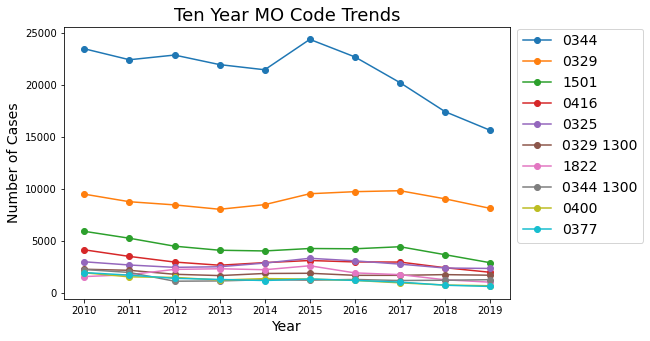

In [19]:
plt.figure(figsize=(8,5))
for col in mocodes_top20.columns:
    plt.plot(mocodes_top20.index[:-1],mocodes_top20[col][:-1],'o-',label=col)
plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left', ncol=1,fontsize=14)
plt.xticks([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019])
plt.xlabel('Year',fontsize=14)
plt.ylabel('Number of Cases',fontsize=14)
plt.title('Ten Year MO Code Trends',fontsize=18);
#plt.savefig('images/mocodes_10yr.png',dpi=235,bbox_inches='tight');

| MO Code | Description |
| - | - |
| **0344** | Removed victim's property |
| **0329** | Vandalized |
| **1501** | Other MO |
| **0416** | Hit/hit with weapon |
| **0325** | Took merchandise |
| **0329, 1300** | Vandalized, vehicle involved |
| **1822** | Stranger |
| **0344, 1300** | Removed victim's property, vehicle involved |
| **0400** | Force used |
| **0377** | Takes victim's ID/driver license |
| **0344, 1606** | Removed victim's property, Open/unlocked |
| **0344, 1609** | Removed victim's property, Smashed |
| **0329, 1307** | Vandalized, breaks window |
| **0930, 1822** | Unauthorized use of victim's credit/debit card or number, stranger |
| **0344, 1607** | Removed victim's property, pried |

In [22]:
lim = 10
print(f"Top {lim} codes contain {crime['Crm Cd Desc'].value_counts(normalize=True)[:lim].sum()*100}% of Crimes")
crime['Crm Cd Desc'].value_counts(normalize=True)[:lim]*100

Top 10 codes contain 63.499455229256185% of Crimes


BATTERY - SIMPLE ASSAULT                                   8.988129
VEHICLE - STOLEN                                           7.666065
BURGLARY FROM VEHICLE                                      7.642039
THEFT PLAIN - PETTY ($950 & UNDER)                         7.023380
BURGLARY                                                   6.969491
THEFT OF IDENTITY                                          5.880040
INTIMATE PARTNER - SIMPLE ASSAULT                          5.424677
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    5.234233
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             4.424769
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                   4.246633
Name: Crm Cd Desc, dtype: float64

### Categories

In [23]:
crime_cats = {}
cats = ['V','V_homicide','V_rape','V_robbery','V_assault_agg','V_assault_sim',
        'P','P_burglary','P_mvt','P_btfv','P_theft_personal','P_theft_other']

for cat in cats:
    crime_cats[cat] = year_series(years,crime,cat,1,0)
crime_cats = pd.DataFrame(crime_cats)
crime_cats['year'] = years
crime_cats.set_index('year',inplace=True)
crime_cats.head(3)

,V,V_homicide,V_rape,V_robbery,V_assault_agg,V_assault_sim,P,P_burglary,P_mvt,P_btfv,P_theft_personal,P_theft_other
year,,,,,,,,,,,,
2010,63110,296,1481,10924,10092,40317,83257,17474,17061,21237,1289,26196
2011,60184,298,1329,10055,9605,38897,79056,17268,15513,18577,1434,26264
2012,58723,298,1469,8967,9120,38869,79902,16402,15197,18701,1531,28071


Text(0.5, 1.0, 'Violent Crime vs Property Crime')

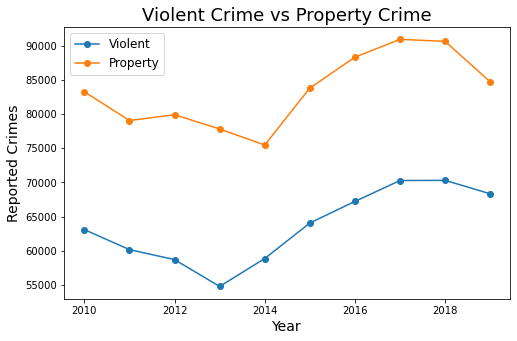

In [24]:
plt.figure(figsize=(8,5))
plt.plot(crime_cats.index[:-1],crime_cats['V'][:-1],'o-',label='Violent')
plt.plot(crime_cats.index[:-1],crime_cats['P'][:-1],'o-',label='Property')
plt.legend(loc='upper left', ncol=1,fontsize=12)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Reported Crimes',fontsize=14)
plt.title('Violent Crime vs Property Crime',fontsize=18)
#plt.savefig('images/violent_vs_property.png',dpi=235,bbox_inches='tight');

Text(0.5, 1.0, 'Violent Crimes')

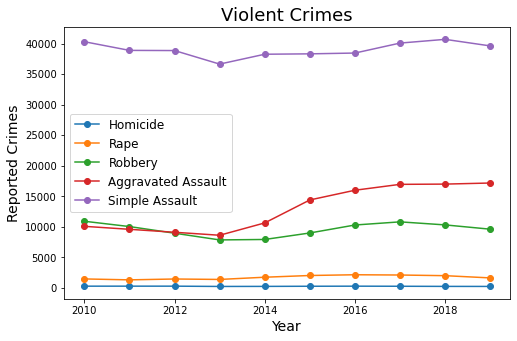

In [25]:
plt.figure(figsize=(8,5))
plt.plot(crime_cats.index[:-1],crime_cats['V_homicide'][:-1],'o-',label='Homicide')
plt.plot(crime_cats.index[:-1],crime_cats['V_rape'][:-1],'o-',label='Rape')
plt.plot(crime_cats.index[:-1],crime_cats['V_robbery'][:-1],'o-',label='Robbery')
plt.plot(crime_cats.index[:-1],crime_cats['V_assault_agg'][:-1],'o-',label='Aggravated Assault')
plt.plot(crime_cats.index[:-1],crime_cats['V_assault_sim'][:-1],'o-',label='Simple Assault')
plt.legend(loc='best', ncol=1,fontsize=12)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Reported Crimes',fontsize=14)
plt.title('Violent Crimes',fontsize=18)
#plt.savefig('images/violent.png',dpi=235,bbox_inches='tight');


Text(0.5, 1.0, 'Property Crimes')

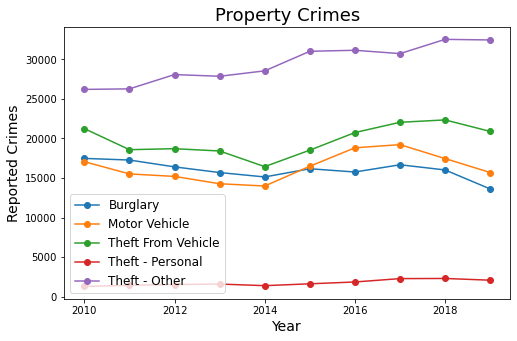

In [26]:
plt.figure(figsize=(8,5))
plt.plot(crime_cats.index[:-1],crime_cats['P_burglary'][:-1],'o-',label='Burglary')
plt.plot(crime_cats.index[:-1],crime_cats['P_mvt'][:-1],'o-',label='Motor Vehicle')
plt.plot(crime_cats.index[:-1],crime_cats['P_btfv'][:-1],'o-',label='Theft From Vehicle')
plt.plot(crime_cats.index[:-1],crime_cats['P_theft_personal'][:-1],'o-',label='Theft - Personal')
plt.plot(crime_cats.index[:-1],crime_cats['P_theft_other'][:-1],'o-',label='Theft - Other')
plt.legend(loc='best', ncol=1,fontsize=12)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Reported Crimes',fontsize=14)
plt.title('Property Crimes',fontsize=18)
#plt.savefig('images/property.png',dpi=235,bbox_inches='tight');

### By month

In [27]:
def month_series(months,data,column,value,norm):
    series = []
    if norm == 0:
        for month in months:
            series.append((data[(data[month]==1) & (data[column] == value)].shape[0]))
    else:
        for month in months:
            series.append((data[(data[month]==1) & (data[column] == value)].shape[0])/(data[data[str(year)]==1].shape[0]))        
    return series

In [28]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']

In [29]:
crime_mons = {}
cats = ['V','V_homicide','V_rape','V_robbery','V_assault_agg','V_assault_sim',
        'P','P_burglary','P_mvt','P_btfv','P_theft_personal','P_theft_other']

for cat in cats:
    crime_mons[cat] = month_series(months,crime,cat,1,0)
crime_mons = pd.DataFrame(crime_mons)
crime_mons['month'] = months
crime_mons.set_index('month',inplace=True)
crime_mons.head(3)

,V,V_homicide,V_rape,V_robbery,V_assault_agg,V_assault_sim,P,P_burglary,P_mvt,P_btfv,P_theft_personal,P_theft_other
month,,,,,,,,,,,,
January,55916,277,1968,8959,11198,33514,78921,15116,15928,19441,1561,26875
February,50768,194,1437,7560,10093,31484,69318,12983,13607,17188,1365,24175
March,57999,252,1468,8385,11906,35988,74611,14217,14858,18055,1440,26041


Text(0.5, 1.0, 'Violent Crime vs Property Crime')

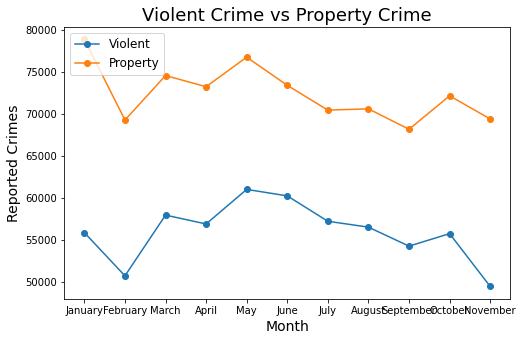

In [30]:
plt.figure(figsize=(8,5))
plt.plot(crime_mons.index[:-1],crime_mons['V'][:-1],'o-',label='Violent')
plt.plot(crime_mons.index[:-1],crime_mons['P'][:-1],'o-',label='Property')
plt.legend(loc='upper left', ncol=1,fontsize=12)
plt.xlabel('Month',fontsize=14)
plt.ylabel('Reported Crimes',fontsize=14)
plt.title('Violent Crime vs Property Crime',fontsize=18)
#plt.savefig('images/violent_vs_property.png',dpi=235,bbox_inches='tight');

Text(0.5, 1.0, 'Property Crimes')

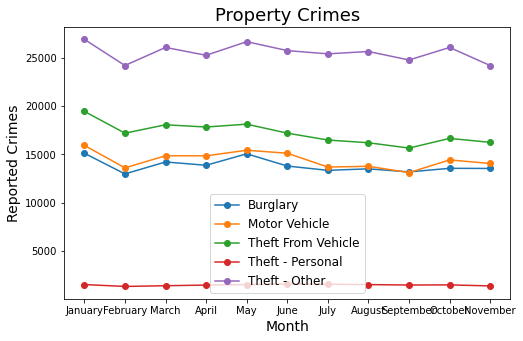

In [31]:
plt.figure(figsize=(8,5))
plt.plot(crime_mons.index[:-1],crime_mons['P_burglary'][:-1],'o-',label='Burglary')
plt.plot(crime_mons.index[:-1],crime_mons['P_mvt'][:-1],'o-',label='Motor Vehicle')
plt.plot(crime_mons.index[:-1],crime_mons['P_btfv'][:-1],'o-',label='Theft From Vehicle')
plt.plot(crime_mons.index[:-1],crime_mons['P_theft_personal'][:-1],'o-',label='Theft - Personal')
plt.plot(crime_mons.index[:-1],crime_mons['P_theft_other'][:-1],'o-',label='Theft - Other')
plt.legend(loc='best', ncol=1,fontsize=12)
plt.xlabel('Month',fontsize=14)
plt.ylabel('Reported Crimes',fontsize=14)
plt.title('Property Crimes',fontsize=18)
#plt.savefig('images/property.png',dpi=235,bbox_inches='tight');

Text(0.5, 1.0, 'Violent Crimes')

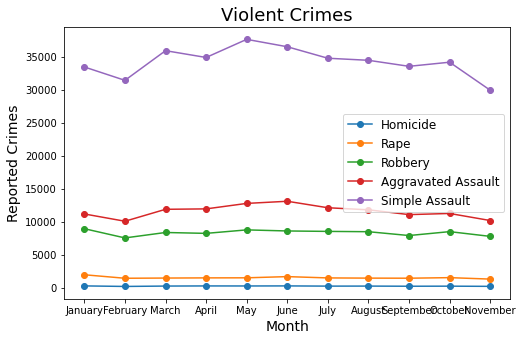

In [32]:
plt.figure(figsize=(8,5))
plt.plot(crime_mons.index[:-1],crime_mons['V_homicide'][:-1],'o-',label='Homicide')
plt.plot(crime_mons.index[:-1],crime_mons['V_rape'][:-1],'o-',label='Rape')
plt.plot(crime_mons.index[:-1],crime_mons['V_robbery'][:-1],'o-',label='Robbery')
plt.plot(crime_mons.index[:-1],crime_mons['V_assault_agg'][:-1],'o-',label='Aggravated Assault')
plt.plot(crime_mons.index[:-1],crime_mons['V_assault_sim'][:-1],'o-',label='Simple Assault')
plt.legend(loc='best', ncol=1,fontsize=12)
plt.xlabel('Month',fontsize=14)
plt.ylabel('Reported Crimes',fontsize=14)
plt.title('Violent Crimes',fontsize=18)
#plt.savefig('images/violent.png',dpi=235,bbox_inches='tight');


### Individual Codes by Month

In [33]:
month_top10 = {}
for desc in top10_desc:
    month_top10[desc] = month_series(months,crime,'Crm Cd Desc',desc,0)
month_top10 = pd.DataFrame(month_top10)
month_top10['month'] = months
month_top10.set_index('month',inplace=True)
month_top10.head(3)

,BATTERY - SIMPLE ASSAULT,VEHICLE - STOLEN,BURGLARY FROM VEHICLE,THEFT PLAIN - PETTY ($950 & UNDER),BURGLARY,THEFT OF IDENTITY,INTIMATE PARTNER - SIMPLE ASSAULT,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)","ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",VANDALISM - MISDEAMEANOR ($399 OR UNDER)
month,,,,,,,,,,
January,16254,15548,15963,13181,13907,15972,9734,9925,7776,8283
February,15179,13305,14068,12058,11979,10858,9083,9084,7127,7422
March,17446,14499,14655,13083,13035,11800,10338,10316,8404,8349


In [34]:
month_top10['month'] = months
month_top10.set_index('month',inplace=True)
month_top10.head(3)

,BATTERY - SIMPLE ASSAULT,VEHICLE - STOLEN,BURGLARY FROM VEHICLE,THEFT PLAIN - PETTY ($950 & UNDER),BURGLARY,THEFT OF IDENTITY,INTIMATE PARTNER - SIMPLE ASSAULT,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)","ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",VANDALISM - MISDEAMEANOR ($399 OR UNDER)
month,,,,,,,,,,
January,16254,15548,15963,13181,13907,15972,9734,9925,7776,8283
February,15179,13305,14068,12058,11979,10858,9083,9084,7127,7422
March,17446,14499,14655,13083,13035,11800,10338,10316,8404,8349


<Figure size 1008x1008 with 0 Axes>

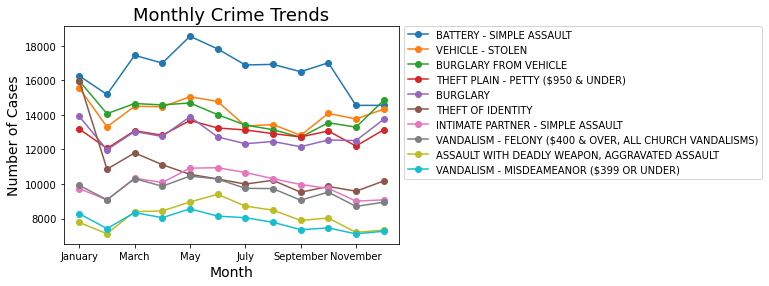

In [35]:
plt.figure(figsize=(14,14))
month_top10.plot(marker='o')
plt.legend(bbox_to_anchor=(1, 1.025), loc='upper left', ncol=1)
plt.xlabel('Month',fontsize=14)
plt.ylabel('Number of Cases',fontsize=14)
plt.title('Monthly Crime Trends',fontsize=18)
plt.savefig('images/topcrimes_monthly.png',dpi=235,bbox_inches='tight');